# Credit Risk Analysis - 2

## Exploratory Data Analysis

In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [108]:
df_credit_risk = pd.read_csv("credit_risk_dataset_clean.csv")
df_credit_risk

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
1,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
2,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
3,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
4,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
...,...,...,...,...,...,...,...,...,...,...,...,...
32561,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32562,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32563,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32564,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [109]:
cols_of_interest = ['person_home_ownership','loan_intent','loan_grade','cb_person_default_on_file']

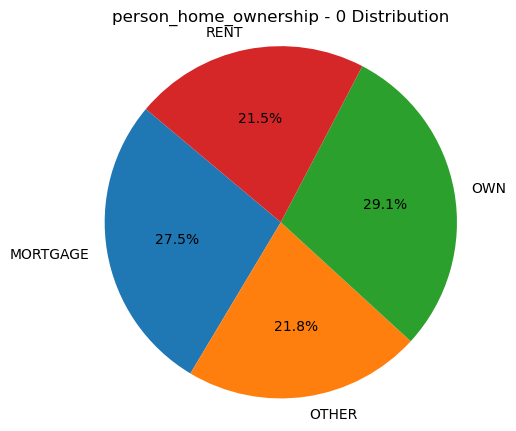

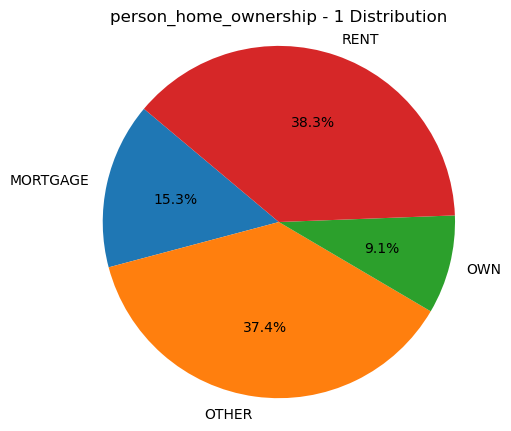

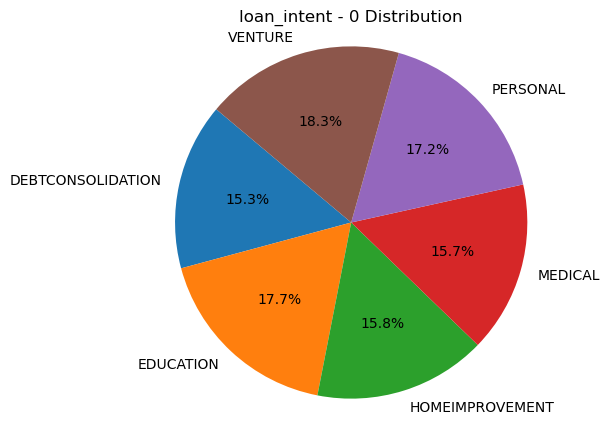

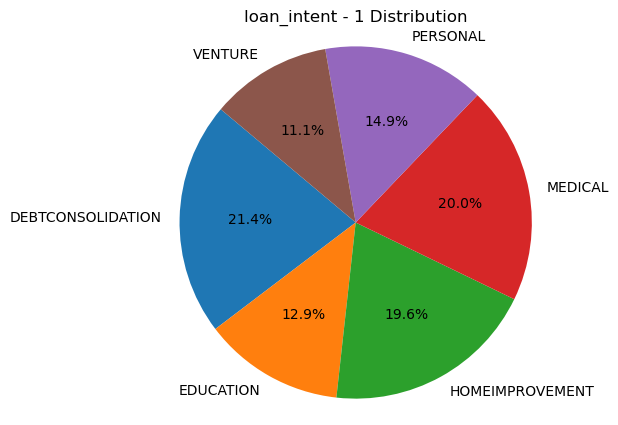

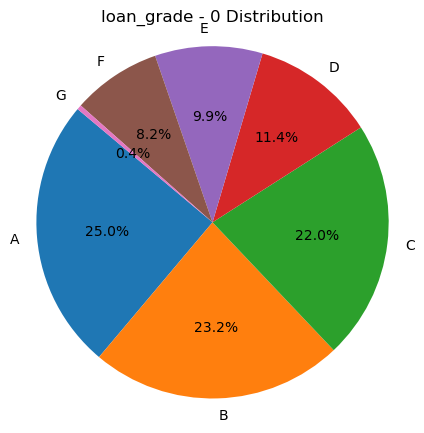

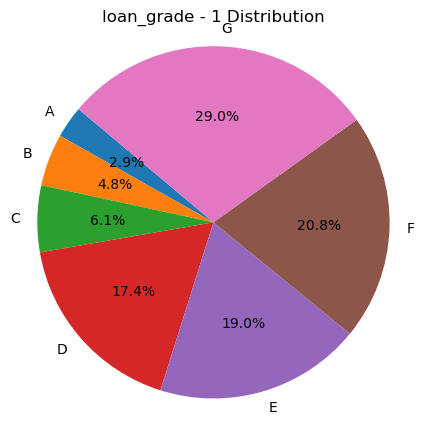

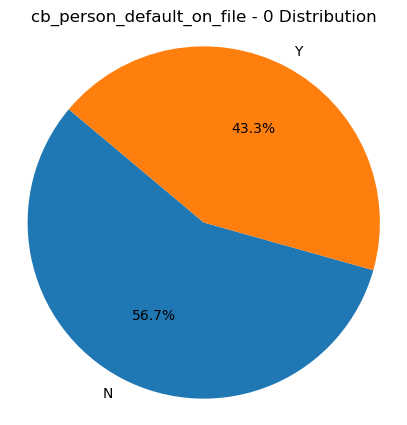

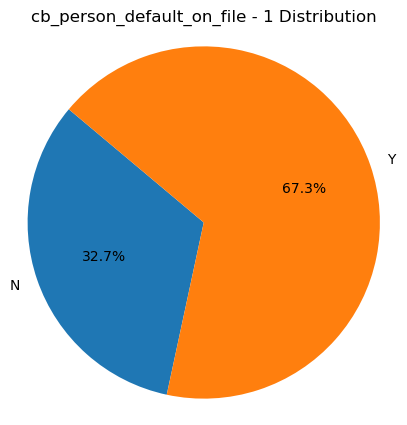

In [113]:
for feature in cols_of_interest:
    df_view = df_credit_risk.groupby([feature])['loan_status'].value_counts(normalize=True).unstack(level=-1)
    
    for status in df_view.columns:
        plt.figure(figsize=(5, 5))
        plt.pie(df_view[status], labels=df_view.index, autopct='%1.1f%%', startangle=140)
        plt.title(f'{feature} - {status} Distribution')
        plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

        plt.show()

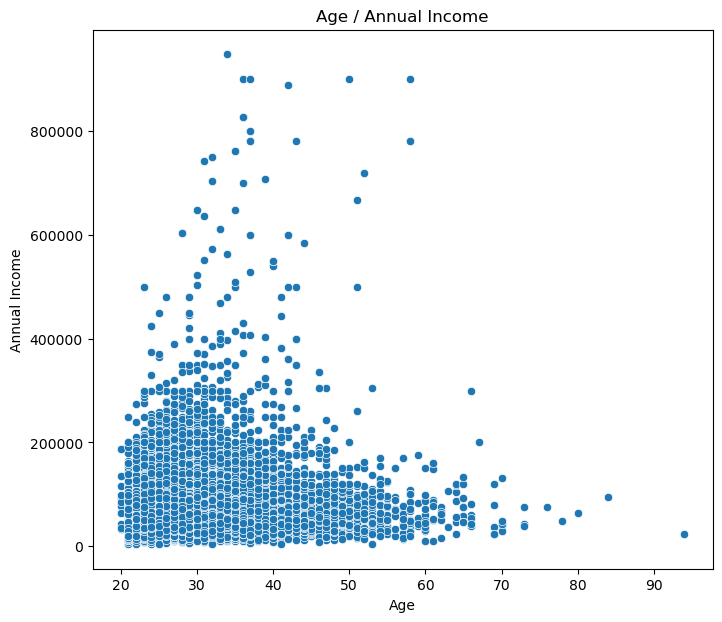

In [114]:
ax1 = sns.scatterplot(data=df_credit_risk, x="person_age", y ="person_income")
ax1.set(title = 'Age / Annual Income')
ax1.set_xlabel('Age')
ax1.set_ylabel('Annual Income')
plt.show()

In [115]:
df_credit_risk_numeric = df_credit_risk.select_dtypes(include=[int, float])
df_credit_risk_numeric.corr()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
person_age,1.000000,0.133405,0.169893,0.052043,0.012259,-0.020343,-0.040559,0.877830
person_income,0.133405,1.000000,0.169058,0.355949,-0.002132,-0.183939,-0.316898,0.115727
person_emp_length,0.169893,0.169058,1.000000,0.110136,-0.056442,-0.086731,-0.058467,0.147164
loan_amnt,0.052043,0.355949,0.110136,1.000000,0.142442,0.105223,0.572532,0.042441
loan_int_rate,0.012259,-0.002132,-0.056442,0.142442,1.000000,0.333617,0.120659,0.016112
loan_status,-0.020343,-0.183939,-0.086731,0.105223,0.333617,1.000000,0.379174,-0.015144
loan_percent_income,-0.040559,-0.316898,-0.058467,0.572532,0.120659,0.379174,1.000000,-0.030476
cb_person_cred_hist_length,0.877830,0.115727,0.147164,0.042441,0.016112,-0.015144,-0.030476,1.000000


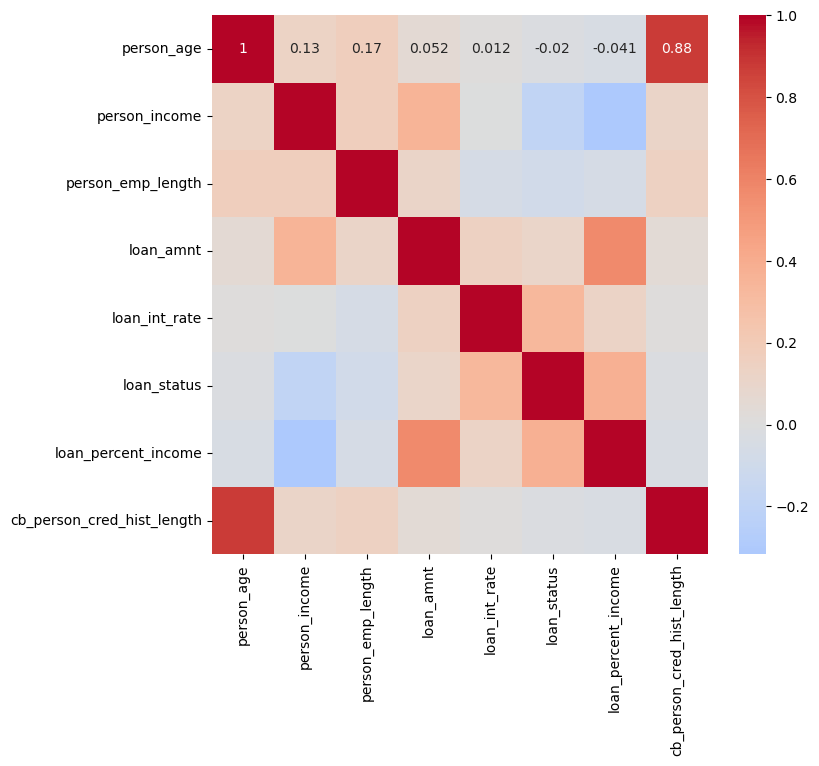

In [116]:
plt.rcParams['figure.figsize']=(8,7)
heatmap = sns.heatmap(df_credit_risk_numeric.corr(), annot=True, cmap='coolwarm', center=0)

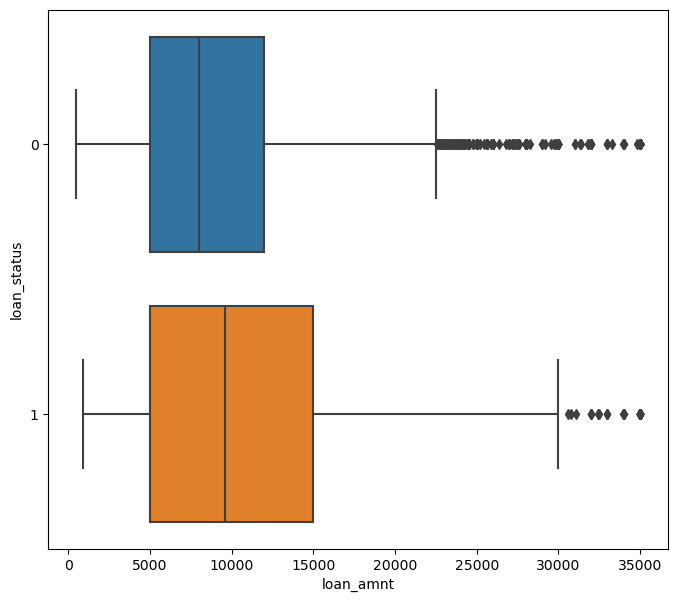

In [117]:
sns.boxplot(x='loan_amnt', y='loan_status', data=df_credit_risk, orient="h")
plt.show()

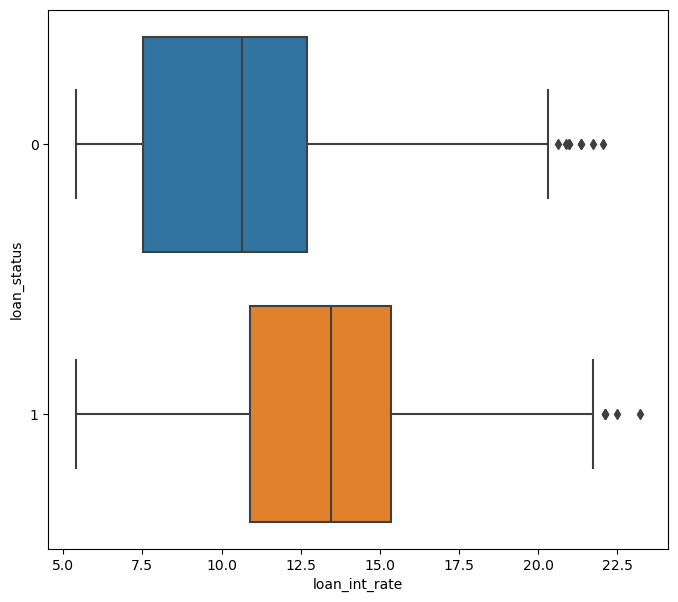

In [118]:
sns.boxplot(x='loan_int_rate', y='loan_status', data=df_credit_risk, orient="h")
plt.show()

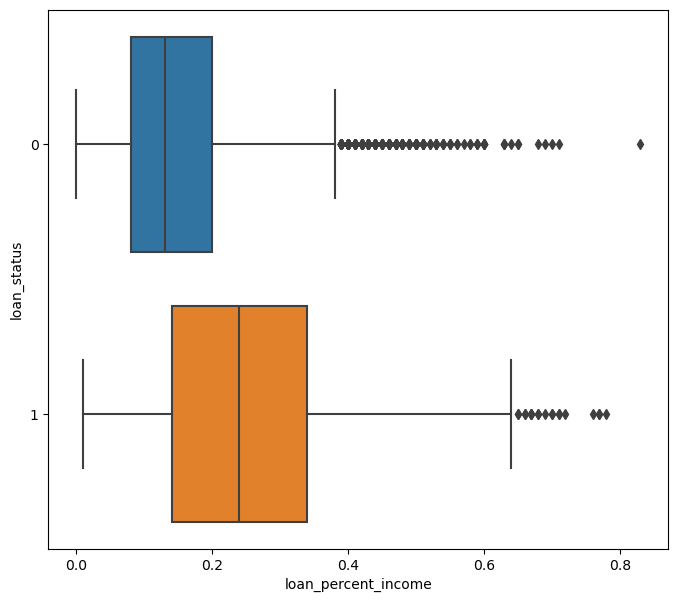

In [119]:
sns.boxplot(x='loan_percent_income', y='loan_status', data=df_credit_risk, orient="h")
plt.show()

## Scaling

In [120]:
numeric_cols = ['person_age', 
                'person_income', 
                'person_emp_length', 
                'loan_amnt', 
                'loan_int_rate', 
                'cb_person_cred_hist_length']

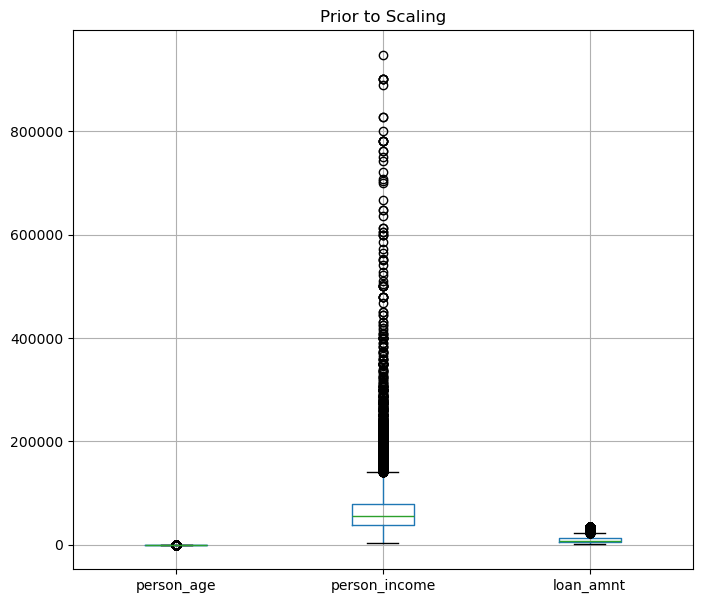

In [121]:
df_credit_risk[['person_age', 'person_income', 'loan_amnt']].boxplot()
plt.title('Prior to Scaling')
plt.show()

In [122]:
mm_scaler = MinMaxScaler()

df_credit_risk[numeric_cols] = mm_scaler.fit_transform(df_credit_risk[numeric_cols])

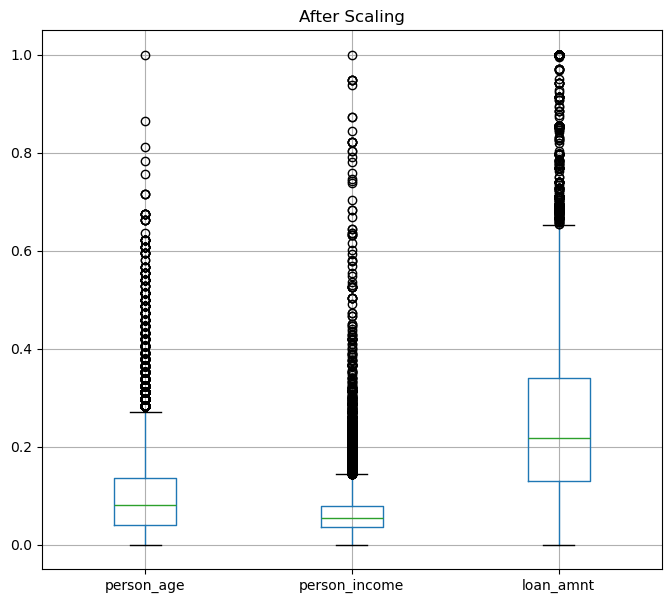

In [123]:
df_credit_risk[['person_age', 'person_income', 'loan_amnt']].boxplot()
plt.title('After Scaling')
plt.show()

In [124]:
df_credit_risk

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,0.013514,0.005932,OWN,0.121951,EDUCATION,B,0.014493,0.321348,0,0.10,N,0.000000
1,0.067568,0.005932,MORTGAGE,0.024390,MEDICAL,C,0.144928,0.418539,1,0.57,N,0.035714
2,0.040541,0.065148,RENT,0.097561,MEDICAL,C,1.000000,0.551124,1,0.53,N,0.000000
3,0.054054,0.053390,RENT,0.195122,MEDICAL,C,1.000000,0.497191,1,0.55,Y,0.071429
4,0.013514,0.006250,OWN,0.048780,VENTURE,A,0.057971,0.096629,1,0.25,N,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
32561,0.500000,0.051907,MORTGAGE,0.024390,PERSONAL,C,0.153623,0.434831,0,0.11,N,1.000000
32562,0.459459,0.122881,MORTGAGE,0.097561,PERSONAL,A,0.496377,0.116292,0,0.15,N,0.607143
32563,0.608108,0.076271,RENT,0.073171,HOMEIMPROVEMENT,B,1.000000,0.312921,1,0.46,N,0.928571
32564,0.486486,0.154661,MORTGAGE,0.121951,PERSONAL,B,0.420290,0.340449,0,0.10,N,0.857143


In [125]:
from sklearn.preprocessing import OneHotEncoder

In [126]:
ohe = OneHotEncoder(sparse_output=False)                   

col_names = ['person_home_ownership','loan_intent','loan_grade','cb_person_default_on_file']

dummy_cols = ohe.fit_transform(df_credit_risk[col_names])
dummy_names = ohe.get_feature_names_out()
dummy_cols = pd.DataFrame(dummy_cols,columns = dummy_names, dtype = int)

df_ohe_credit_risk = pd.concat([df_credit_risk,dummy_cols], axis = 1)
df_ohe_credit_risk = df_ohe_credit_risk.drop(col_names, axis = 1)
df_loan_default = df_ohe_credit_risk
df_loan_default

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
0,0.013514,0.005932,0.121951,0.014493,0.321348,0,0.10,0.000000,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0.067568,0.005932,0.024390,0.144928,0.418539,1,0.57,0.035714,1,0,...,0,0,0,1,0,0,0,0,1,0
2,0.040541,0.065148,0.097561,1.000000,0.551124,1,0.53,0.000000,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0.054054,0.053390,0.195122,1.000000,0.497191,1,0.55,0.071429,0,0,...,0,0,0,1,0,0,0,0,0,1
4,0.013514,0.006250,0.048780,0.057971,0.096629,1,0.25,0.000000,0,0,...,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32561,0.500000,0.051907,0.024390,0.153623,0.434831,0,0.11,1.000000,1,0,...,0,0,0,1,0,0,0,0,1,0
32562,0.459459,0.122881,0.097561,0.496377,0.116292,0,0.15,0.607143,1,0,...,0,1,0,0,0,0,0,0,1,0
32563,0.608108,0.076271,0.073171,1.000000,0.312921,1,0.46,0.928571,0,0,...,0,0,1,0,0,0,0,0,1,0
32564,0.486486,0.154661,0.121951,0.420290,0.340449,0,0.10,0.857143,1,0,...,0,0,1,0,0,0,0,0,1,0


In [127]:
df_loan_default.to_csv('credit_risk_dataset_feat.csv', index=False)

print("DataFrame exported successfully!")

DataFrame exported successfully!
